In [1]:
import syft as sy
sy.requires(">=0.8-beta")
node = sy.orchestra.launch(name="test-domain-1")
domain_client = node.login(email="info@openmined.org", password="changethis")

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /


✅ The installed version of syft==0.8.0b6 matches the requirement >=0.8b0
SQLite Store Path:
!open file:///var/folders/79/0t1vmtq92cb82c47x_vmxgj40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.Proj

In [4]:
import sys
import jax as hidden_jax
import jax.numpy as jnp 
from typing import Any
from syft.core.node.new.jax import DeviceArrayObject 

class SyftCompiledFunction(sy.ActionObject):
    def __init__(sel):
        pass


class SyftCompiledFunctionPointer(sy.ActionObject):

    def __init__(self, compiled_function, domain):
        self.compiled_function = compiled_function
        self.domain = domain
        self.domain.api.jax.submit_function(...)

    def __call__(self, *args, **kwargs):
        # TODO: 
        result = self.domain.api.jax.run_function(id=self.id)
        # result = SyftNotReady if function not approved
        # result = SyftError if function denied
        # result = SyftOk if function approved
        return 
# def jit_wrapper(
#   fun: Callable,
#   in_shardings=sharding_impls.UNSPECIFIED,
#   out_shardings=sharding_impls.UNSPECIFIED,
#   static_argnums: Union[int, Sequence[int], None] = None,
#   static_argnames: Union[str, Iterable[str], None] = None,
#   donate_argnums: Union[int, Sequence[int]] = (),
#   keep_unused: bool = False,
#   device: Optional[xc.Device] = None,
#   backend: Optional[str] = None,
#   inline: bool = False,
#   abstracted_axes: Optional[Any] = None,
# ):

node = sy.login(....)
jax = node.jax


def jit_wrapper(*args, **kwargs):
    compiled_function = hidden_jax.jit(*args, **kwargs)
    return SyftCompiledFunctionPointer(compiled_function)

class WrapperJaxNumpy:
    def __getattribute__(self, __name: str) -> Any:
        print(__name)
        return hidden_jnp.__getattribute__(__name)

class WrapperJax:
    def __getattribute__(self, __name: str) -> Any:
        print(__name)
        if __name == "jit":
            return jit_wrapper
        return hidden_jax.__getattribute__(__name)

sys.modules['syft.jax'] = WrapperJax()

In [ ]:
f_hidden_jit = hidden_jax.jit(f)

In [ ]:
import inspect

source_code = inspect.getsource(f_hidden_jit._fun)
exec(source_code)

<function __main__.f(x)>

In [ ]:
hidden_jax.make_jaxpr(f_hidden_jit)([0])

{ lambda ; a:i64[]. let
    b:i64[] c:i64[] = xla_call[
      call_jaxpr={ lambda ; d:i64[]. let  in (d, d) }
      name=f
    ] a
  in (b, c) }

In [ ]:
# hidden_jax.lax

In [ ]:
import syft.jax as jax

def f(x):
  if len(x) > 4:
    return x
  else:
    return 2 * x

f_jit = jax.jit(f)

__spec__
__spec__
jit


In [ ]:
f_jit()

WE are trying


In [ ]:
jax.jit

<function jax._src.api.jit(fun: Callable, *, static_argnums: Union[int, Iterable[int], NoneType] = None, static_argnames: Union[str, Iterable[str], NoneType] = None, device: Optional[jaxlib.xla_extension.Device] = None, backend: Optional[str] = None, donate_argnums: Union[int, Iterable[int]] = (), inline: bool = False, keep_unused: bool = False, abstracted_axes: Optional[Any] = None) -> jax._src.stages.Wrapped>

In [ ]:
from syft.jax import numpy as jnp

__spec__
__path__
numpy
numpy


In [ ]:
jnp.arange(10)

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
import jax
import jax.numpy as jnp
from syft.core.node.new.jax import DeviceArrayObject 
# from syft import jax

x = jnp.arange(10)
y = jnp.ones(10)


In [ ]:
type(x)

jaxlib.xla_extension.DeviceArray

In [ ]:
from syft.core.node.new.action_object import ActionObject

action_object = ActionObject.from_obj(x) 

<class 'jaxlib.xla_extension.DeviceArray'>
<class 'syft.core.node.new.jax.DeviceArrayObject'>
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
action_object

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
domain_client.api.services.action.save(action_object)

initial data <class 'syft.core.node.new.sqlite_document_store.SQLiteBackingStore'>
4c81e9aa1ece4511ab58299b9c2929c7
final data {<UID: 4c81e9aa1ece4511ab58299b9c2929c7>: DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)}
ActionServiceSave: Ok(<class 'syft.core.node.new.response.SyftSuccess'>: Set for ID: 4c81e9aa1ece4511ab58299b9c2929c7)


<class 'syft.core.node.new.response.SyftSuccess'>: <class 'syft.core.node.new.jax.DeviceArrayObject'> saved

In [ ]:
result = domain_client.api.services.action.get(action_object.id)

In [ ]:
result.syft_action_data

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
type(result)

syft.core.node.new.jax.DeviceArrayObject

In [ ]:
result.__jax_array__()

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
# jnp.dot(result, result)

In [ ]:
len(result)

10

In [ ]:
import jax
def f(x):
  if len(x) > 4:
    return x
  else:
    return 2 * x

f_jit = jax.jit(f)

In [ ]:
f_jit

<CompiledFunction of <function f at 0x7f4852b5a170>>

In [ ]:
result.id

<UID: 4c81e9aa1ece4511ab58299b9c2929c7>

In [ ]:
f_jit(result)

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
x.client

In [ ]:
result.device().client

In [ ]:
dir(f_jit)

['__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__',
 '_cache_miss',
 '_cache_size',
 '_clear_cache',
 '_fun',
 'clear_cache',
 'lower']

In [ ]:
import inspect
inspect.getsource(f_jit._fun)

'def f(x):\n  if len(x) > 4:\n    return x\n  else:\n    return 2 * x\n'

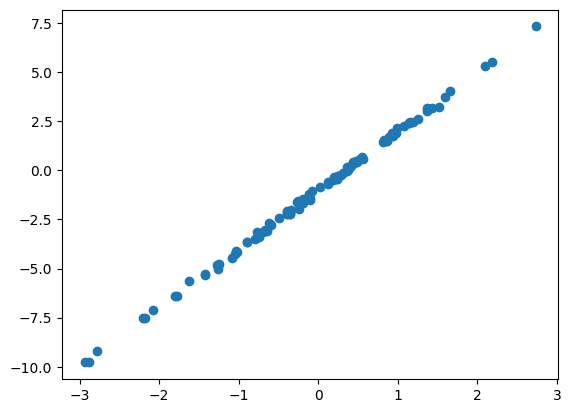

In [5]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)


def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

theta = jnp.array([1., 1.])

for _ in range(10):
  theta = update(theta, xs, ys)



In [15]:
from syft.core.node.new.jax import DeviceArrayObject 

syft_obj = DeviceArrayObject(syft_action_data=model(theta, xs))
type(syft_obj.__array__())


numpy.ndarray

w: 2.66, b: -0.74


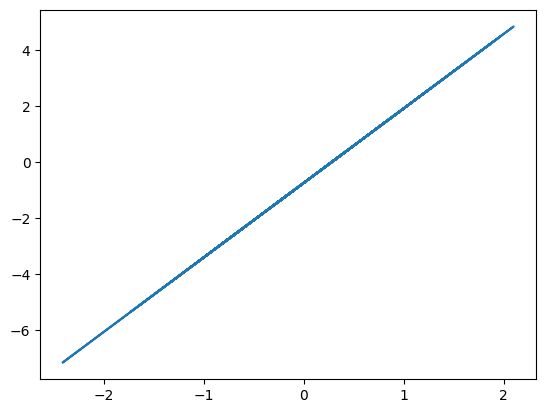

In [17]:
# plt.scatter(xs, ys)
# plt.plot(xs, syft_obj.__array__())
# plt.plot(xs, np.array(syft_obj))
plt.plot(xs, np.array(syft_obj))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")